In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

In [2]:
class FinancialInstrument():
    pass

In [3]:
stock = FinancialInstrument()

In [4]:
stock

In [5]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

In [6]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

In [7]:
stock.ticker

'AAPL'

In [8]:
stock.end

'2019-12-31'

In [9]:
stock.start

'2015-01-01'

In [12]:
yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [13]:
raw = yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


In [14]:
raw.rename(columns={"Close": "price"}, inplace=True)

In [15]:
raw

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [37]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
    
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close": "price"}, inplace=True)
        self.data = raw


In [38]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [39]:
stock.ticker

'AAPL'

In [35]:
stock.get_data()

[*********************100%***********************]  1 of 1 completed


In [40]:
stock.data

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [46]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close": "price"}, inplace=True)
        self.data = raw
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))


In [47]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [48]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


In [44]:
stock.log_returns()

In [45]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


In [50]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close": "price"}, inplace=True)
        self.data = raw
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))


In [51]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [52]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [53]:
print(stock)

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)


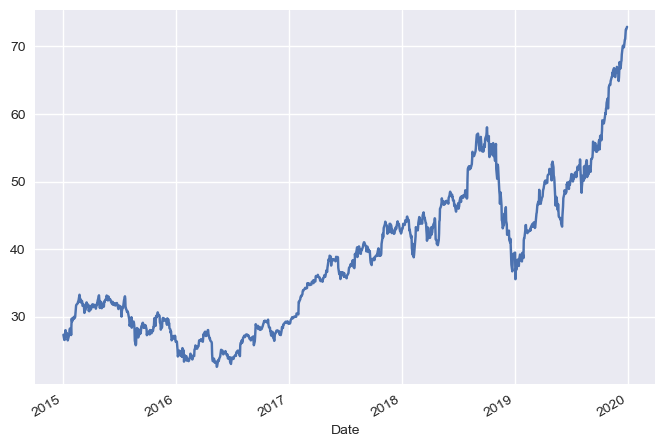

In [54]:
stock.data.price.plot()
plt.show()

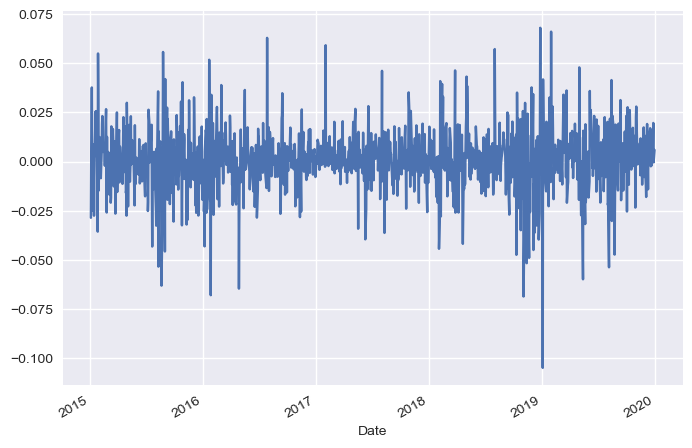

In [55]:
stock.data.log_returns.plot()
plt.show()

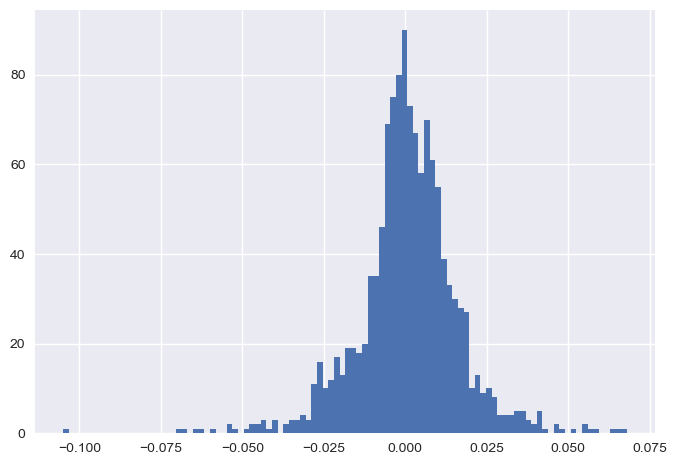

In [56]:
stock.data.log_returns.hist(bins=100)
plt.show()

In [57]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close": "price"}, inplace=True)
        self.data = raw
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize=15)
        
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize=(12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize=15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize=15)
                    


In [58]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


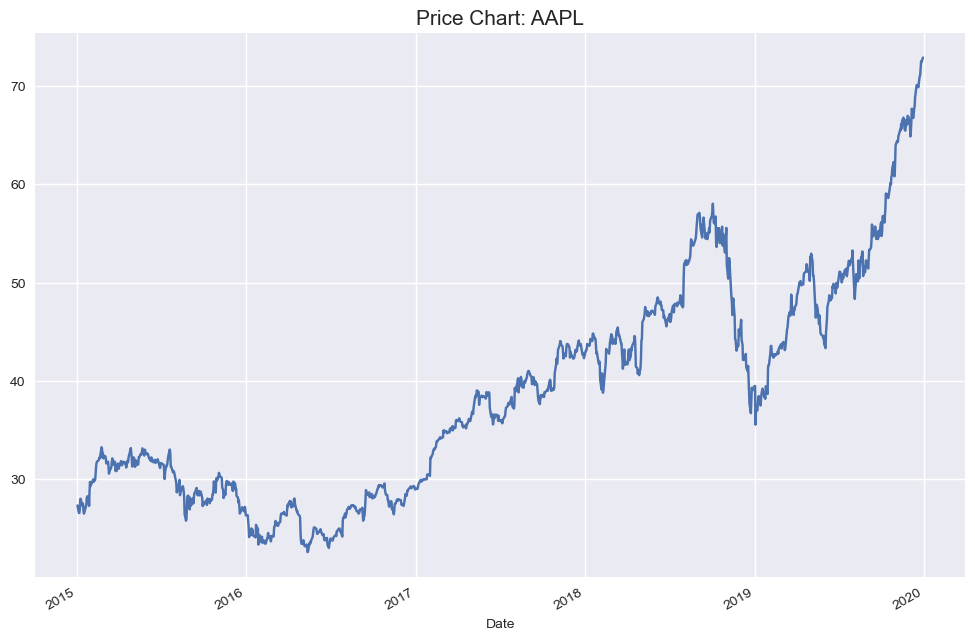

In [59]:
stock.plot_prices()

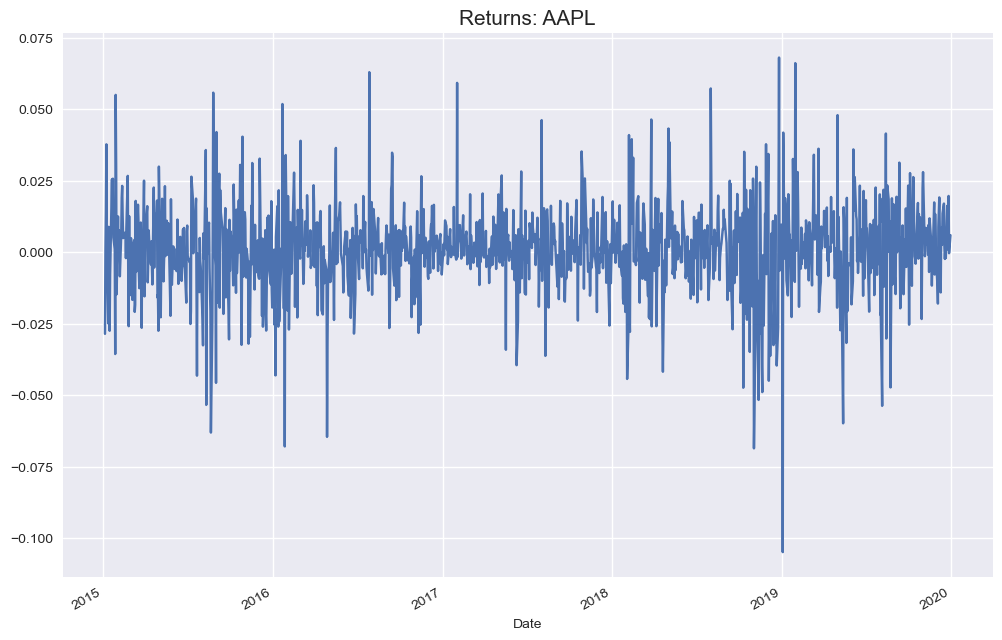

In [61]:
stock.plot_returns()

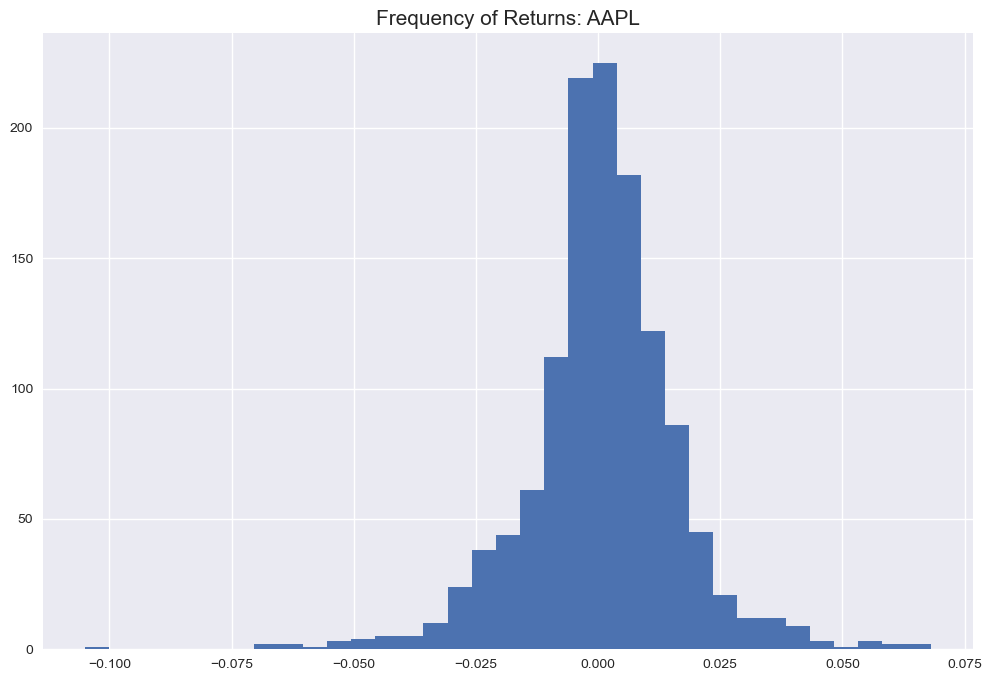

In [62]:
stock.plot_returns(kind="hist")

In [63]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close": "price"}, inplace=True)
        self.data = raw
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
        
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize=(12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize=15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)
                    


In [64]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [67]:
stock._ticker = "TEST"

In [68]:
stock._ticker

'TEST'

In [69]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close": "price"}, inplace=True)
        self.data = raw
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
        
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize=(12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize=15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)
            
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
                    


In [70]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


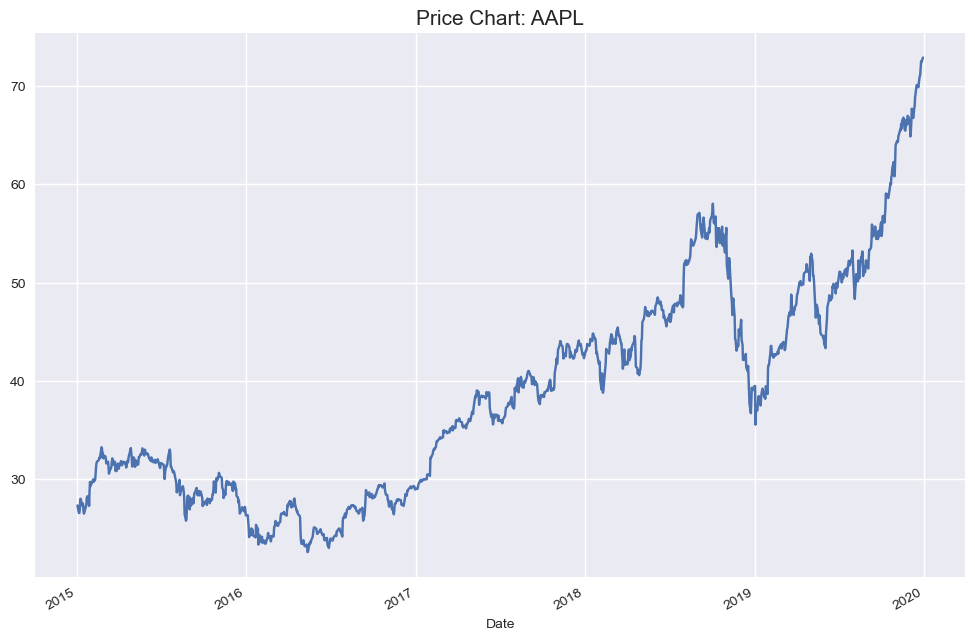

In [71]:
stock.plot_prices()

In [72]:
stock.set_ticker('GE')

[*********************100%***********************]  1 of 1 completed


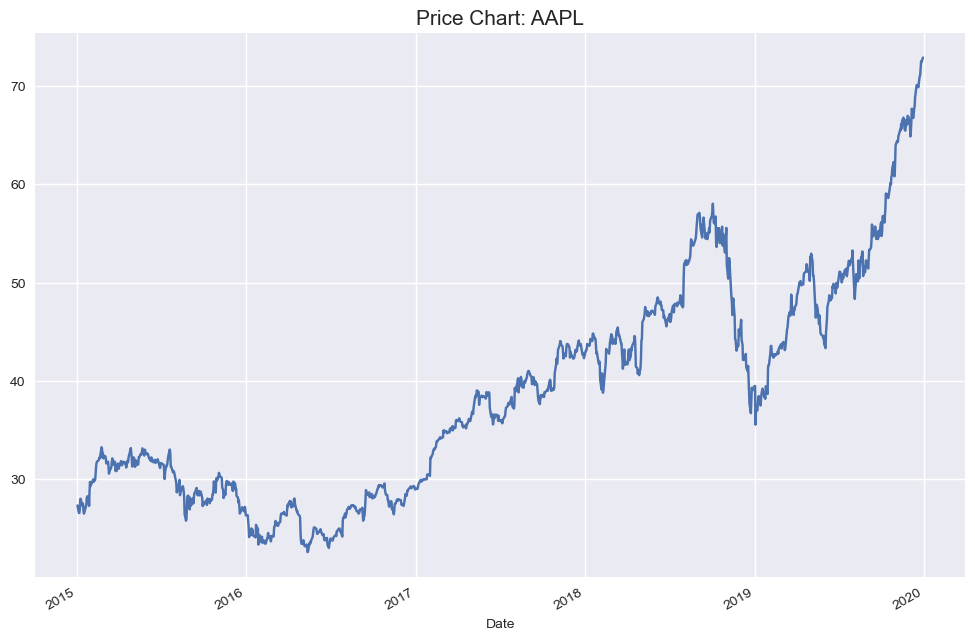

In [73]:
stock.plot_prices()

In [74]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close": "price"}, inplace=True)
        self.data = raw
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
        
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize=(12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize=15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)
            
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq=None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
        
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
    
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))


In [75]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [76]:
stock.mean_return()

0.0007808421402793629

In [77]:
stock.mean_return("m")

0.015450305477429897

In [78]:
stock.std_returns()

0.015692926036583846

In [79]:
stock.std_returns("m")

0.07624174164379921

In [80]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


In [111]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close": "price"}, inplace=True)
        self.data = raw
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
        
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize=(12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize=15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)
            
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()


In [112]:
class RiskReturn(FinancialInstrument):
    
    def __repr__(self):
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
            
    def mean_return(self, freq=None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
        
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
    
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))


In [113]:
stock = RiskReturn("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [114]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


In [115]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


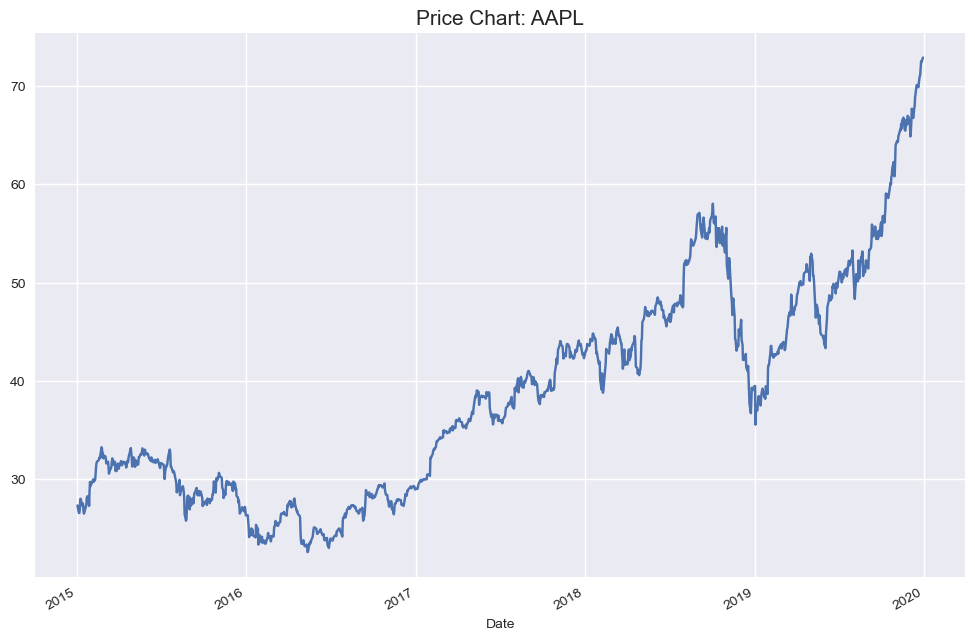

In [116]:
stock.plot_prices()

In [117]:
stock.set_ticker("GE")

[*********************100%***********************]  1 of 1 completed


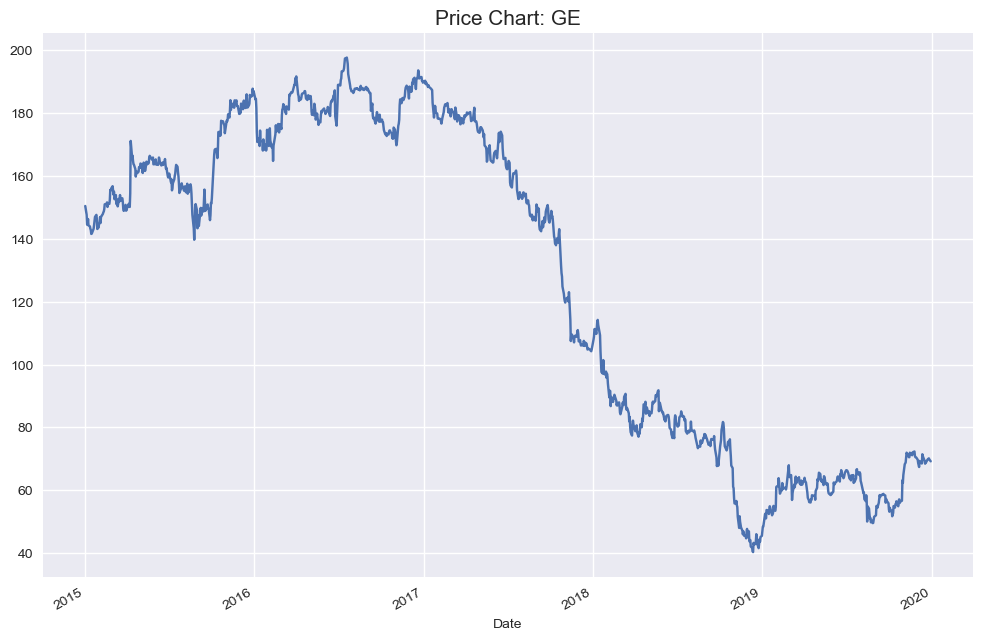

In [118]:
stock.plot_prices()

In [119]:
stock

RiskReturn(ticker = GE, start = 2015-01-01, end = 2019-12-31)

In [123]:
class RiskReturn(FinancialInstrument):
    
    def __init__(self, ticker, start, end, freq = None):
        self.freq = freq
        super().__init__(ticker, start, end)
    
    def __repr__(self):
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
            
    def mean_return(self):
        if self.freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
        
    def std_returns(self):
        if self.freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
    
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))


In [124]:
stock = RiskReturn("AAPL", "2015-01-01", "2019-12-31", freq="w")

[*********************100%***********************]  1 of 1 completed


In [125]:
stock.freq

'w'

In [126]:
stock._ticker

'AAPL'

In [127]:
stock.mean_return()

0.0037576158168232733

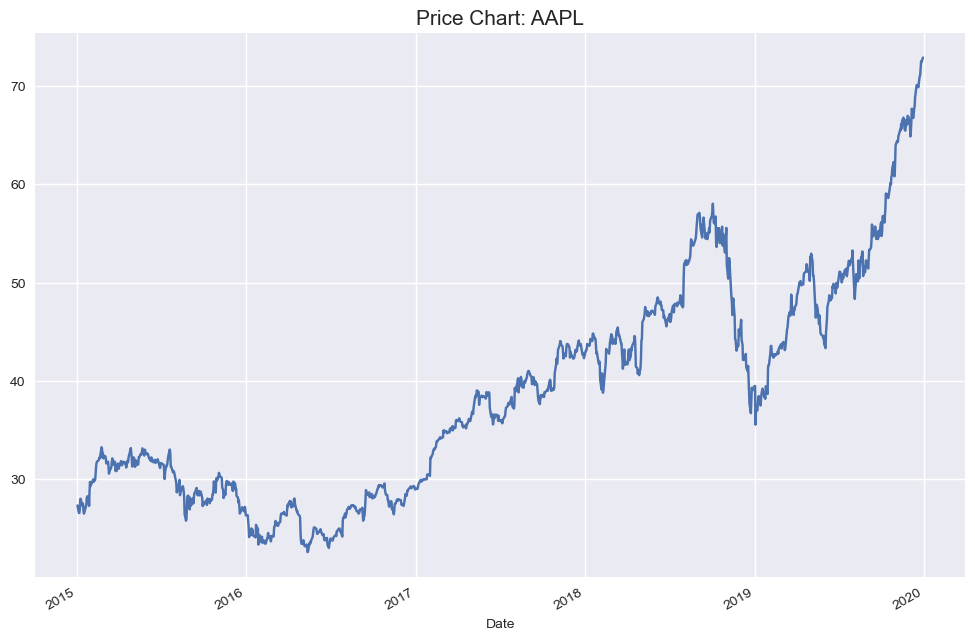

In [128]:
stock.plot_prices()

In [133]:
class FinancialInstrument():
    ''' 주식과 같은 금융상품을 분석하는 클래스
    '''
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns={"Close": "price"}, inplace=True)
        self.data = raw
    
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
        
    def plot_returns(self, kind="ts"):
        ''' 로그 수익률을 시계열 시리즈나("ts") 히스토그램("hist")을 플롯으로 시각화한다
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize=(12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize=15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)
            
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq=None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
        
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
    
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))


In [134]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock.plot_returns()